---

# Exploratory Data Analysis
## 12
**[15 points]** Here you'll bring together some of the individual skills that you demonstrated above and create a Jupyter notebook based blog post on your exploratory data analysis. Your goal is to identify a question or problem and to work towards solving it or providing additional information or evidence (data) related to it through your data analysis. Below, we walk through a process to follow for your analysis. Additionally, you can find an [example of a well-done exploratory data analysis here from past years](https://github.com/kylebradbury/ids705/blob/master/assignments/Assignment_1_Q12_Example.ipynb).

1. Find a dataset that interests you and relates to a question or problem that you find intriguing.
2. Describe the dataset, the source of the data, and the reason the dataset was of interest. Include a description of the features, data size, data creator and year of creation (if available), etc. What question are you hoping to answer through exploring the dataset?
3. Check the data and see if they need to be cleaned: are there missing values? Are there clearly erroneous values? Do two tables need to be merged together? Clean the data so it can be visualized. If the data are clean, state how you know they are clean (what did you check?).
3. Plot the data, demonstrating interesting features that you discover. Are there any relationships between variables that were surprising or patterns that emerged? Please exercise creativity and curiosity in your plots. You should have at least a ~3 plots exploring the data in different ways.
4. What insights are you able to take away from exploring the data? Is there a reason why analyzing the dataset you chose is particularly interesting or important? Summarize this for a general audience (imagine your publishing a blog post online) - boil down your findings in a way that is accessible, but still accurate.

Here your analysis will evaluated based on:
1. Motivation: was the purpose of the choice of data clearly articulated? Why was the dataset chosen and what was the goal of the analysis?
2. Data cleaning: were any issues with the data investigated and, if found, were they resolved?
3. Quality of data exploration: were at least 4 unique plots (minimum) included and did those plots demonstrate interesting aspects of the data? Was there a clear purpose and takeaway from EACH plot? 
4. Interpretation: Were the insights revealed through the analysis and their potential implications clearly explained? Was there an overall conclusion to the analysis?

# An analysis of the individual voters in the 2016 USA Presidential Election

Here your analysis will evaluated based on:
1. Motivation: was the purpose of the choice of data clearly articulated? Why was the dataset chosen and what was the goal of the analysis?
2. Data cleaning: were any issues with the data investigated and, if found, were they resolved?
3. Quality of data exploration: were at least 4 unique plots (minimum) included and did those plots demonstrate interesting aspects of the data? Was there a clear purpose and takeaway from EACH plot? 
4. Interpretation: Were the insights revealed through the analysis and their potential implications clearly explained? Was there an overall conclusion to the analysis?

1. The motivation of this analysis is to understand the individual voters in the 2016 USA Presidential Election. The dataset is chosen from Kaggle, which is a website that provides datasets for data scientists. The dataset is chosen because it is a large dataset that contains many features of the voters. The goal of the analysis is to understand the voters' characteristics and how they affect the election results.


2. The data is mostly clean.  There are some missing values for who was voted for, so I decided to drop those rows.  I left other nulls as they do not grossly affect the analysis.

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

# Read the data
voter_data = pd.read_csv('../data/trum.csv')

In [2]:
# drop rows where votetrump is null
voter_data = voter_data.dropna(subset=['votetrump'])

In [3]:
# reset the index (also dropping uid column which is not needed)
voter_data = voter_data.drop(['uid'], axis=1)
voter_data = voter_data.reset_index(drop=True)

In [4]:
voters_trump = voter_data[voter_data['votetrump'] == 1]
voters_clinton = voter_data[voter_data['votetrump'] == 0]
# ratio
len(voters_clinton) / len(voters_trump)

1.3957344708077846

In [5]:
voter_data.shape

(44932, 20)

In [6]:
voter_data.head()

,state,votetrump,age,female,collegeed,racef,famincr,ideo,pid7na,bornagain,religimp,churchatd,prayerfreq,angryracism,whiteadv,fearraces,racerare,lrelig,lcograc,lemprac
0,New Hampshire,1.0,47,1,0,White,NaN,3.0,5.0,0.0,3.0,1.0,3.0,2.0,3.0,1.0,3.0,-0.191681,0.475294,-0.138715
1,Louisiana,1.0,22,1,0,White,6.0,3.0,4.0,NaN,NaN,NaN,NaN,1.0,4.0,1.0,1.0,NaN,-0.185682,-0.619427
2,Colorado,0.0,34,1,1,White,7.0,2.0,2.0,0.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,-1.130175,-1.204085,-0.138715
3,Texas,1.0,54,0,0,White,3.0,5.0,6.0,1.0,4.0,5.0,7.0,2.0,5.0,2.0,2.0,1.171097,0.508762,0.204095
4,Georgia,1.0,53,0,0,White,4.0,4.0,7.0,1.0,2.0,3.0,6.0,3.0,4.0,1.0,2.0,-0.263387,0.301278,0.070166


In [7]:
voter_data.describe()

,votetrump,age,female,collegeed,famincr,ideo,pid7na,bornagain,religimp,churchatd,prayerfreq,angryracism,whiteadv,fearraces,racerare,lrelig,lcograc,lemprac
count,44932.000000,44932.000000,44932.000000,44932.000000,40212.000000,43430.000000,44320.000000,44910.000000,44912.000000,44610.000000,44028.000000,44885.000000,44880.000000,44832.000000,44846.000000,44928.000000,44931.000000,44930.000000
mean,0.417409,51.887675,0.545558,0.409552,6.661096,3.025443,3.628046,0.273191,2.797983,2.903878,4.384642,1.677621,2.651114,2.132205,2.279980,0.007330,-0.011388,-0.010587
std,0.493137,16.006674,0.497926,0.491757,3.133376,1.109896,2.199976,0.445603,1.158270,1.699801,2.349439,0.961253,1.465142,1.130224,1.234908,0.948422,0.826406,0.471285
min,0.000000,18.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.584900,-1.204085,-0.619427
25%,0.000000,38.000000,0.000000,0.000000,4.000000,2.000000,1.000000,0.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,-0.637953,-0.643632,-0.619427
50%,0.000000,54.000000,1.000000,0.000000,6.000000,3.000000,4.000000,0.000000,3.000000,2.000000,5.000000,1.000000,2.000000,2.000000,2.000000,0.060855,-0.005524,0.052228
75%,1.000000,64.000000,1.000000,1.000000,9.000000,4.000000,6.000000,1.000000,4.000000,5.000000,7.000000,2.000000,4.000000,3.000000,3.000000,0.746089,0.508762,0.271789
max,1.000000,95.000000,1.000000,1.000000,12.000000,5.000000,7.000000,1.000000,4.000000,6.000000,7.000000,5.000000,5.000000,5.000000,5.000000,1.696614,1.841226,1.386214


In [8]:
voter_data.isnull().sum()

state             0
votetrump         0
age               0
female            0
collegeed         0
racef             0
famincr        4720
ideo           1502
pid7na          612
bornagain        22
religimp         20
churchatd       322
prayerfreq      904
angryracism      47
whiteadv         52
fearraces       100
racerare         86
lrelig            4
lcograc           1
lemprac           2
dtype: int64

The features are as follows:

| Column Name  | Description                                                                                     |
|--------------|-------------------------------------------------------------------------------------------------|
| `state`      | A character vector for the state in which the respondent resides                                 |
| `votetrump`  | A numeric that equals 1 if the respondent says s/he voted for Trump in 2016                      |
| `age`        | A numeric vector for age, roughly calculated as 2016 - birthyr                                   |
| `female`     | A numeric that equals 1 if the respondent is a woman                                             |
| `collegeed`  | A numeric vector that equals 1 if the respondent says s/he has a college degree                  |
| `racef`      | A character vector for the race of the respondent                                                |
| `famincr`    | A numeric vector for the respondent's household income, ranging from 1 to 12                     |
| `ideo`       | A numeric vector for the respondent's ideology, ranging from 1 (very liberal) to 5 (very conservative) |
| `pid7na`     | A numeric vector for the respondent's partisanship, ranging from 1 to 7                          |
| `bornagain`  | A numeric vector for whether the respondent self-identifies as a born-again Christian            |
| `religimp`   | A numeric vector for the importance of religion to the respondent, ranging from 1 to 4           |
| `churchatd`  | A numeric vector for the extent of church attendance, ranging from 1 to 6                        |
| `prayerfreq` | A numeric vector for the frequency of prayer, ranging from 1 to 7                                |
| `angryracism`| A numeric vector for how angry the respondent is that racism exists, ranging from 1 to 5          |
| `whiteadv`   | A numeric vector for agreement with the statement that white people have advantages, ranging from 1 to 5  |
| `fearraces`  | A numeric vector for agreement with the statement that the respondent fears other races, ranging from 1 to 5 |
| `racerare`   | A numeric vector for agreement with the statement that racism is rare in the U.S., ranging from 1 to 5   |
| `lrelig`     | A numeric vector that serves as a latent estimate for religiosity                                |
| `lcograc`    | A numeric vector that serves as a latent estimate for cognitive racism                           |
| `lemprac`    | A numeric vector that serves as a latent estimate for empathetic racism                          |

We can now explore the relation between the features and the voting results.

In [14]:
# correlation matrix
corr = voter_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,votetrump,age,female,collegeed,famincr,ideo,pid7na,bornagain,religimp,churchatd,prayerfreq,angryracism,whiteadv,fearraces,racerare,lrelig,lcograc,lemprac
votetrump,1.000000,0.184245,-0.083383,-0.148235,0.000199,0.606259,0.725064,0.229583,0.283912,0.206353,0.245038,0.402290,0.621102,0.116723,0.425202,0.284777,0.584180,0.342119
age,0.184245,1.000000,-0.103753,-0.148028,-0.033995,0.180310,0.119883,0.023539,0.135981,0.057779,0.158883,0.097561,0.143682,0.034021,0.019096,0.141173,0.086982,0.087371
female,-0.083383,-0.103753,1.000000,-0.078838,-0.167920,-0.077010,-0.080537,0.043492,0.096512,0.031227,0.149445,-0.152191,-0.068963,-0.009951,-0.130972,0.101554,-0.115926,-0.100028
collegeed,-0.148235,-0.148028,-0.078838,1.000000,0.347783,-0.133413,-0.093793,-0.105742,-0.097616,0.034600,-0.088573,-0.034737,-0.175281,-0.055089,-0.045801,-0.076789,-0.123367,-0.061074
famincr,0.000199,-0.033995,-0.167920,0.347783,1.000000,-0.004805,0.035677,-0.108169,-0.084798,0.019418,-0.093834,0.035490,-0.038516,-0.038032,0.035875,-0.076363,-0.000451,0.000802
ideo,0.606259,0.180310,-0.077010,-0.133413,-0.004805,1.000000,0.665230,0.321649,0.402754,0.339664,0.349586,0.355933,0.539715,0.135583,0.416658,0.420340,0.550662,0.328901
pid7na,0.725064,0.119883,-0.080537,-0.093793,0.035677,0.665230,1.000000,0.215752,0.257421,0.208613,0.224211,0.361262,0.563761,0.092791,0.388113,0.265890,0.540808,0.307729
bornagain,0.229583,0.023539,0.043492,-0.105742,-0.108169,0.321649,0.215752,1.000000,0.495949,0.473106,0.466520,0.060686,0.172973,0.067246,0.148905,0.534871,0.181204,0.083788
religimp,0.283912,0.135981,0.096512,-0.097616,-0.084798,0.402754,0.257421,0.495949,1.000000,0.712647,0.777780,0.073551,0.239156,0.095083,0.184184,0.949120,0.243892,0.112193
churchatd,0.206353,0.057779,0.031227,0.034600,0.019418,0.339664,0.208613,0.473106,0.712647,1.000000,0.633241,0.052719,0.148339,0.062789,0.156665,0.824504,0.178421,0.078347


In [10]:
voter_data['racef'].value_counts()

White              34679
Black               4168
Hispanic            2876
Asian               1194
Mixed                961
Other                608
Native American      371
Middle Eastern        75
Name: racef, dtype: int64

In [11]:
voter_data.groupby('votetrump').mean()

,age,female,collegeed,famincr,ideo,pid7na,bornagain,religimp,churchatd,prayerfreq,angryracism,whiteadv,fearraces,racerare,lrelig,lcograc,lemprac
votetrump,,,,,,,,,,,,,,,,,
0.0,49.391412,0.580701,0.471253,6.660578,2.454326,2.279102,0.186609,2.519644,2.607251,3.897067,1.350398,1.880866,2.020557,1.835369,-0.221269,-0.420029,-0.147062
1.0,55.371794,0.496508,0.323434,6.661849,3.818212,5.514232,0.394067,3.186493,3.318639,5.064383,2.134604,3.726205,2.288081,2.900091,0.326432,0.558944,0.179898


In [61]:
feature_desc_dict = {
    'state': 'State of Residence',
    'votetrump': 'Voted for Trump',
    'age': 'Age at time of vote',
    'female': 'Is a Woman',
    'collegeed': 'Has a College Education',
    'racef': 'Race of Voter',
    'famincr': 'Household Income (1 to 12)',
    'ideo': 'Ideology (1 lib to 5 con)',
    'pid7na': 'Partisanship (1 to 7)',
    'bornagain': 'Born Again Christian',
    'religimp': 'Importance of Religion (1 to 4)',
    'churchatd': 'Church Attendance (1 to 6)',
    'prayerfreq': 'Frequency of Prayer (1 to 7)',
    'angryracism': 'Angry that Racism exists (1 to 5)',
    'whiteadv': 'Agree Whites have advantages (1 to 5)',
    'fearraces': 'Fear of other Races (1 to 5)',
    'racerace': 'Agree that racism is rare in the US (1 to 5)',
    'lrelig': 'Latent Estimate of Religiosity',
    'lcograc': 'Latent Estimate of Cognitive Racism',
    'lemprac': 'Latent Estimate of Empathetic Racism',
}

# Dictionary to map full state names to two-letter abbreviations
state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'District of Columbia': 'DC',
    'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL',
    'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA',
    'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN',
    'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY',
    'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR',
    'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD',
    'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA',
    'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}


In [24]:
voter_data['state_abbrev'] = voter_data['state'].map(state_abbrev)

In [19]:
# histogram comparison function
def histo_compare(t_df, c_df, stat, title, nbins=20):
    t_df[stat].hist(bins=nbins, alpha=0.5, label='Trump', color='red')
    c_df[stat].hist(bins=nbins, alpha=0.5, label='Clinton', color='blue')
    plt.legend(loc='upper right')
    plt.title(title)
    plt.xlabel(feature_desc_dict[stat])
    plt.ylabel('Frequency')
    # show the average
    plt.axvline(t_df[stat].mean(), color='red', linestyle='dashed', linewidth=1)
    plt.axvline(c_df[stat].mean(), color='blue', linestyle='dashed', linewidth=1)


# function for trump_v_clinton pie charts
def piechart_compare(t_df, c_df, stat, title):
    labels = 'Trump', 'Clinton'
    sizes = [t_df[stat].mean(), c_df[stat].mean()]
    colors = ['red', 'blue']
    explode = (0, 0.1) # explode 1st slice
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')
    plt.title(title)
    plt.show()


def pie_percentage(percent_yes, percent_no, labels, colors, title):
    sizes = [percent_yes, percent_no]
    explode = (0, 0.1) # explode 1st slice
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')
    plt.title(title)
    plt.show()

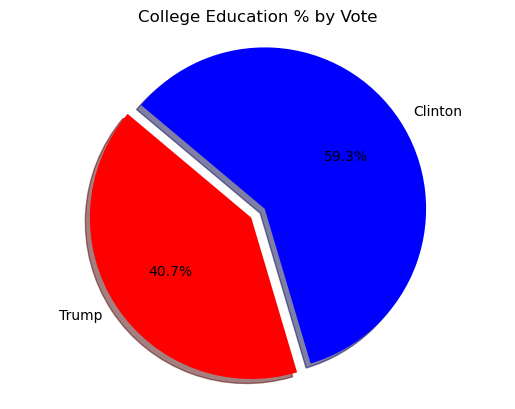

In [17]:
# pie chart of collegeed for trump vs clinton
piechart_compare(voters_trump, voters_clinton, 'collegeed', 'College Education % by Vote')

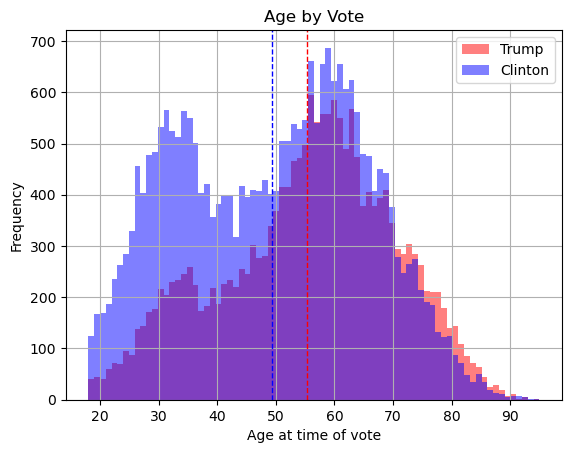

In [18]:
histo_compare(voters_trump, voters_clinton, 'age', 'Age by Vote', nbins=1 + voters_trump['age'].max() - voters_clinton['age'].min())

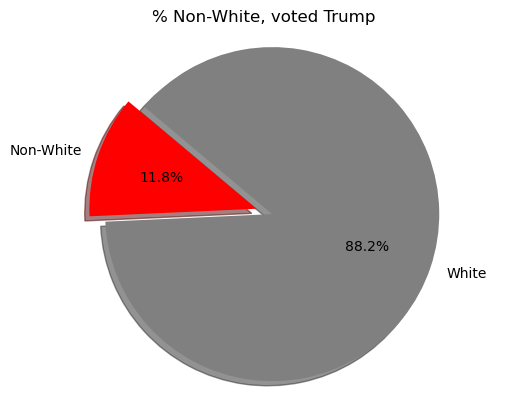

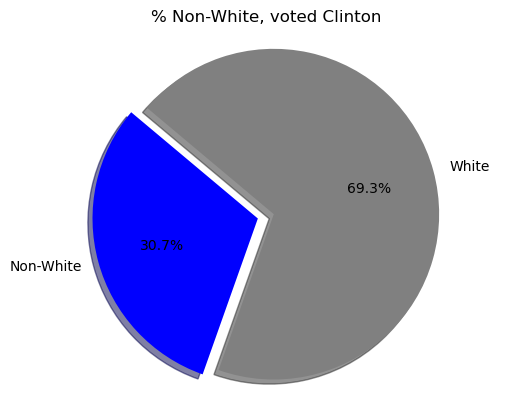

In [20]:
# percentages of non white voters
non_white_trump = voters_trump[voters_trump['racef'] != 'White']
non_white_clinton = voters_clinton[voters_clinton['racef'] != 'White']
trump_nonwhite_vote_percent = len(non_white_trump) / len(voters_trump)
clinton_nonwhite_vote_percent = len(non_white_clinton) / len(voters_clinton)
trump_white_vote_percent = 1 - trump_nonwhite_vote_percent
clinton_white_vote_percent = 1 - clinton_nonwhite_vote_percent

trump_colors = ['red', 'gray']
clin_colors = ['blue', 'gray']
labels = 'Non-White', 'White'


pie_percentage(trump_nonwhite_vote_percent, trump_white_vote_percent, labels, trump_colors, '% Non-White, voted Trump')
pie_percentage(clinton_nonwhite_vote_percent, clinton_white_vote_percent, labels, clin_colors, '% Non-White, voted Clinton')

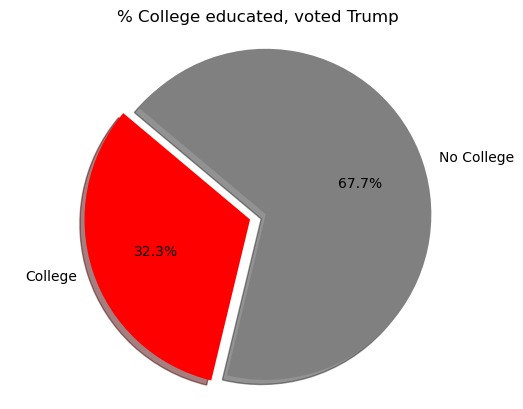

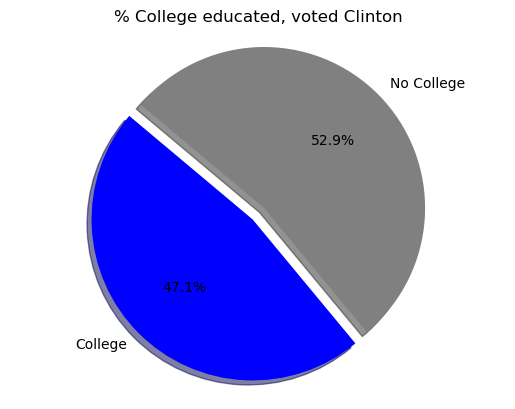

In [21]:
college_trump = voters_trump[voters_trump['collegeed'] == 1]
college_clinton = voters_clinton[voters_clinton['collegeed'] == 1]
trump_college_yes = len(college_trump) / len(voters_trump)
clinton_college_yes = len(college_clinton) / len(voters_clinton)
trump_college_no = 1 - trump_college_yes
clinton_college_no = 1 - clinton_college_yes

labels = 'College', 'No College'

pie_percentage(trump_college_yes, trump_college_no, labels, trump_colors, '% College educated, voted Trump')
pie_percentage(clinton_college_yes, clinton_college_no, labels, clin_colors, '% College educated, voted Clinton')

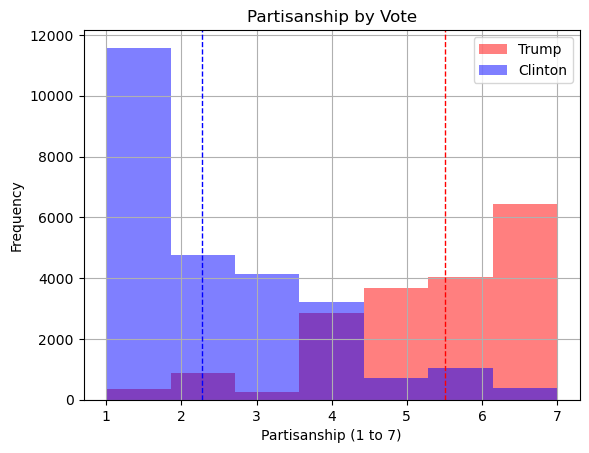

In [22]:
histo_compare(voters_trump, voters_clinton, 'pid7na', 'Partisanship by Vote', nbins=7)

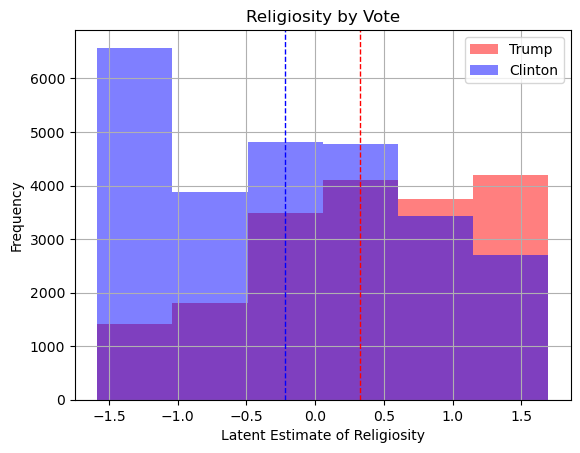

In [23]:
histo_compare(voters_trump, voters_clinton, 'lrelig', 'Religiosity by Vote', nbins=6)

In [68]:
def choropleth_vote_data(df, feature, color_scale='tropic'):
    state_avg_data = df.groupby('state_abbrev')[feature].mean().reset_index()
    fig = px.choropleth(state_avg_data, 
                    locations='state_abbrev', 
                    locationmode="USA-states", 
                    color=feature,
                    color_continuous_scale=color_scale,
                    scope="usa",
                    labels={feature: feature_desc_dict[feature]},
                    title='Average {} by U.S. State'.format(feature_desc_dict[feature]))

    fig.update_layout(width=1000, height=600, dragmode=False)

    # show average on legend
    fig.add_annotation(text='Average: {:.2f}'.format(state_avg_data[feature].mean()), x=0.5, y=-0.1, showarrow=False, yshift=10)

    fig.show()

In [69]:
choropleth_vote_data(voter_data, 'lrelig')

In [70]:
choropleth_vote_data(voter_data, 'lcograc')

In [71]:
choropleth_vote_data(voter_data, 'pid7na')